# Titanic Classification
By Nitish Raj Vinnakota

# About the Data Set

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Objectives

1. Understand the Dataset & cleanup (if required).
2. Build a strong classification model to predict whether the passenger
survives or not.
3. Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


**Link to Data Set:**
https://www.kaggle.com/datasets/yasserh/titanic-dataset

# Data Preparation

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Dataset
titanic = pd.read_csv('/content/Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Reading first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Reading last 5 rows
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Showing no. of rows and columns of dataset
titanic.shape

(891, 12)

In [ ]:
# checking for columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')



```
Information about Columns

PassengerId: unique id number to each passenger
Survived: passenger survive(1) or died(0)
Pclass: passenger class
Name: name
Sex: gender of passenger
Age: age of passenger
SibSp: number of siblings/spouses
Parch: number of parents/children
Ticket: ticket number
Fare: amount of money spent on ticket
Cabin: cabin category
Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton
```



# Data Preprocessing and Data Cleaning

In [ ]:
# Checking for data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# checking for duplicated values
titanic.duplicated().sum()

0

Null Values Treatment

In [ ]:
# checking for null values
nv = titanic.isna().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin       687
Age         177
Embarked      2
dtype: int64

In [ ]:
# Cheecking what percentage column contain missing values
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [ ]:
# Since Cabin Column has more than 75 % null values .So , we will drop this column
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# Filling Null Values in Age column with mean values of age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

# filling null values in Embarked Column with mode values of embarked column
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [ ]:
# checking for null values
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Finding no. of unique values in each column of dataset
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [ ]:
titanic['Survived'].unique()

array([0, 1])

In [ ]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# Dropping Some Unnecessary Columns

There are 3 columns i.e.. 'PassengerId' , 'Name' , 'Ticket' are unnecessary columns which have no use in data modelling . So, we will drop these 3 columns

In [ ]:
titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [ ]:
# Showing inforamation about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
# showing info. about numerical columns
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# showing info. about categorical columns
titanic.describe(include='O')

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,B96 B98,S
freq,577,4,644


# Data Visualization

**Sex Column**

In [ ]:
d1 = titanic['Sex'].value_counts()
d1

Sex
male      577
female    314
Name: count, dtype: int64

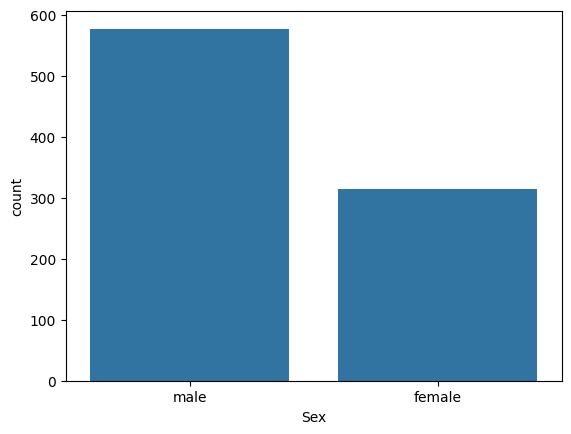

In [ ]:
# Plotting Count plot for sex column
sns.countplot(x=titanic['Sex'])
plt.show()

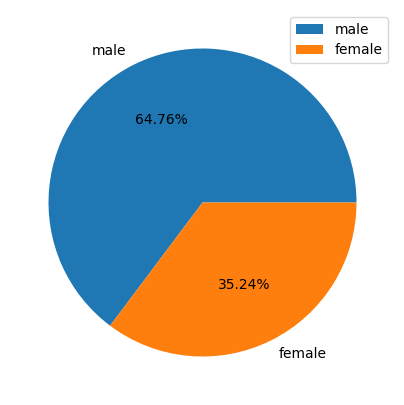

In [ ]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()

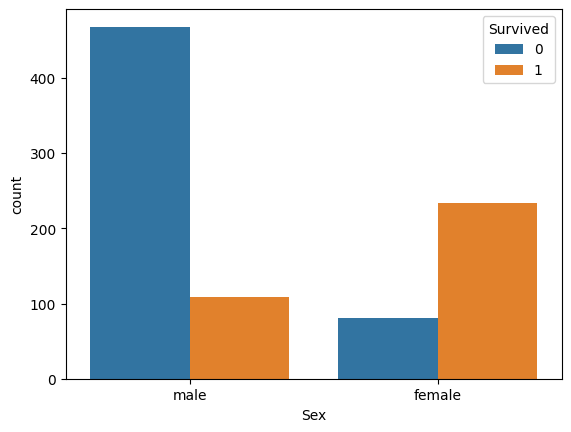

In [ ]:
# Showing Distribution of Sex Column Survived Wise
sns.countplot(x=titanic['Sex'],hue=titanic['Survived']) # In Sex (0 represents female and 1 represents male)
plt.show()

This plot clearly shows male died more than females and females survived more than male percentage.

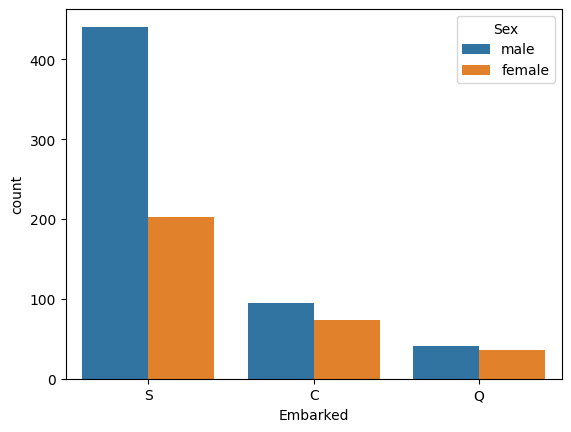

In [ ]:
# Showing Distribution of Embarked Sex wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Sex'])
plt.show()

**Pclass Column**

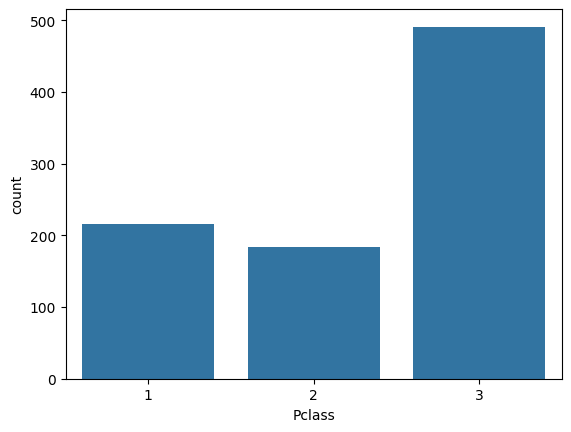

In [ ]:
# Plotting CountPlot for Pclass Column
sns.countplot(x=titanic['Pclass'])
plt.show()

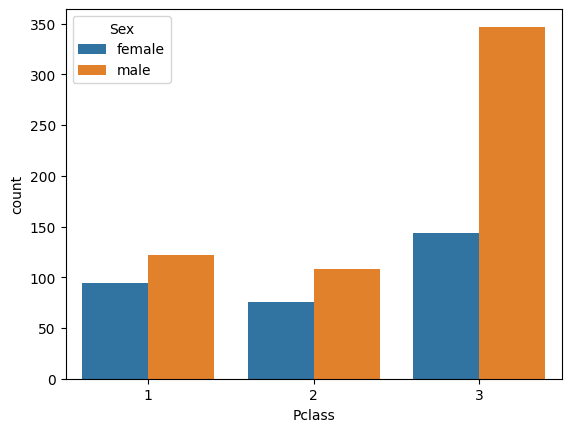

In [ ]:
# Showing Distribution of Pclass Sex wise
sns.countplot(x=titanic['Pclass'],hue=titanic['Sex'])
plt.show()

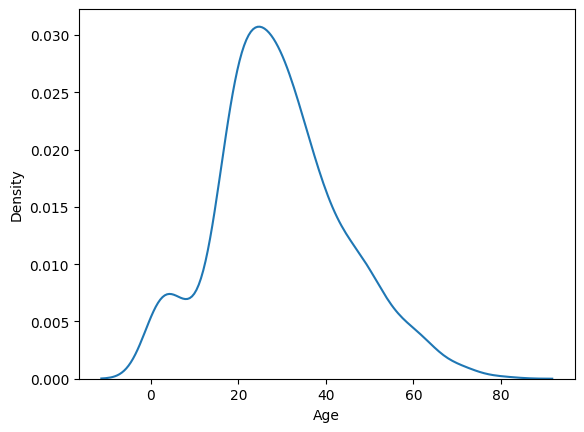

In [ ]:
# Age Distribution
sns.kdeplot(x=titanic['Age'])
plt.show()

From this plot it came to know that most of the people lie between 20-40 age group.

**Analysing Target Variable**

Survived Column

Survived
0    549
1    342
Name: count, dtype: int64


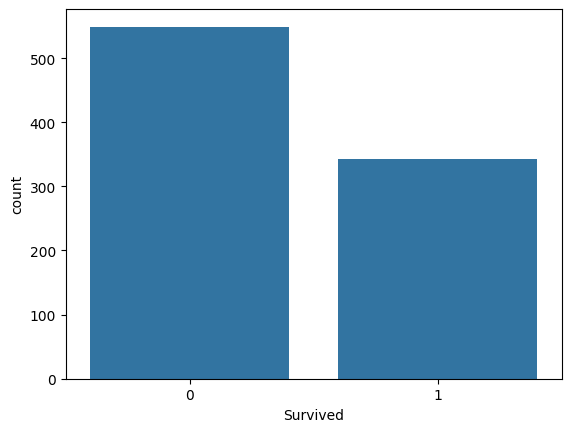

In [ ]:
# Plotting CountPlot for Survived Column
print(titanic['Survived'].value_counts())
sns.countplot(x=titanic['Survived'])
plt.show()

This plot Clearly shows most people are died

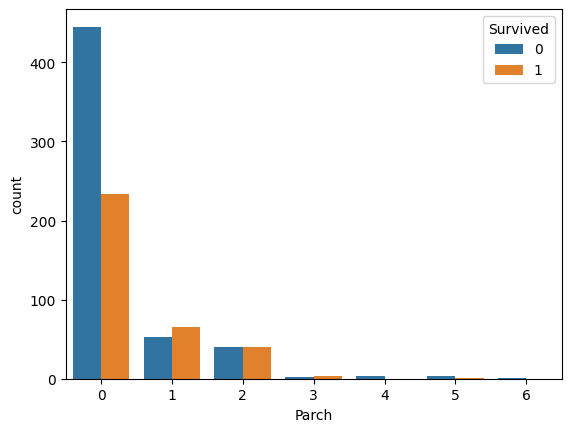

In [ ]:
# Showing Distribution of Parch Survived Wise
sns.countplot(x=titanic['Parch'],hue=titanic['Survived'])
plt.show()

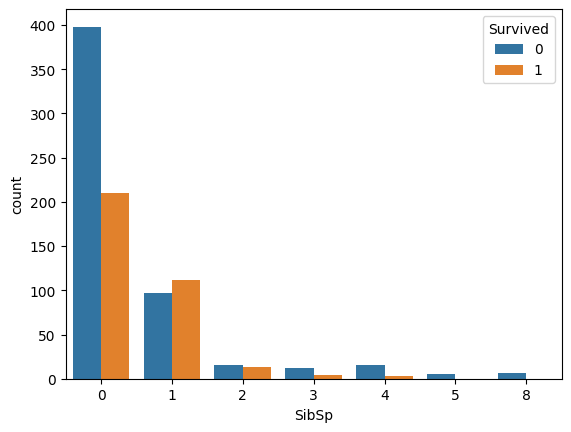

In [ ]:
# Showing Distribution of SibSp Survived Wise
sns.countplot(x=titanic['SibSp'],hue=titanic['Survived'])
plt.show()

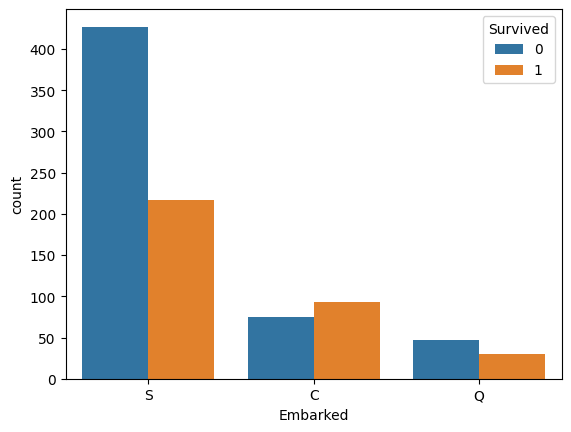

In [ ]:
# Showing Distribution of Embarked Survived wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Survived'])
plt.show()

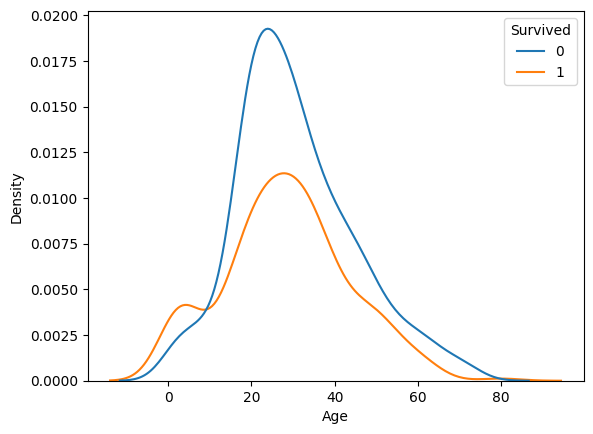

In [ ]:
# Showinf Distribution of Age Survived Wise
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

This Plot showing most people of age group of 20-40 are died

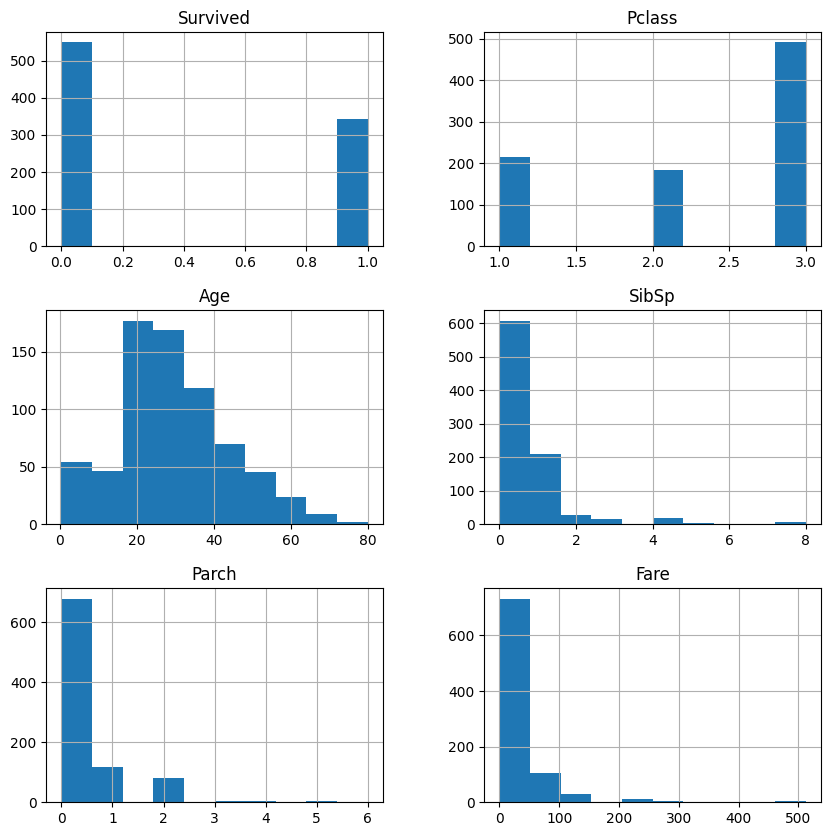

In [ ]:
# Plotting Histplot for Dataset
titanic.hist(figsize=(10,10))
plt.show()

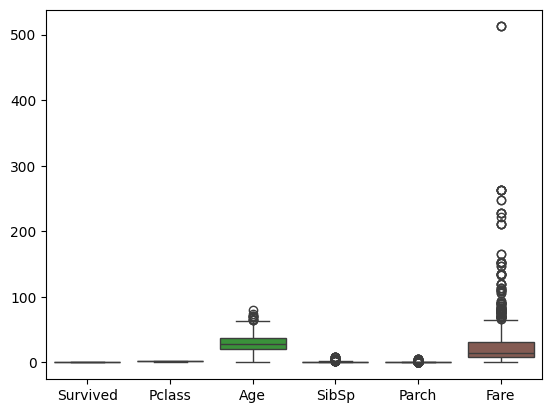

In [ ]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic)
plt.show()

This Plot showing Outliers in 2 columns i.e. Age and Fare.

In [ ]:
# showing Correlation
titanic_encoded.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022148,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660,0.093349,-0.322308
Age,0.036847,-0.077221,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523,0.006954,-0.312271
SibSp,-0.057527,-0.035322,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941,-0.055932,0.092548
Parch,-0.001652,0.081629,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036,-0.000734,0.015790
Fare,0.012658,0.257307,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603,-0.118557,-0.413333
Sex_male,0.042939,-0.543351,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722,-0.064746,0.137143
Embarked_Q,-0.033606,0.003650,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624,-0.127301,0.237449
Embarked_S,0.022148,-0.155660,-0.032523,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000,0.192061,-0.009511
Pclass_2,-0.000086,0.093349,0.006954,-0.055932,-0.000734,-0.118557,-0.064746,-0.127301,0.192061,1.000000,-0.565210


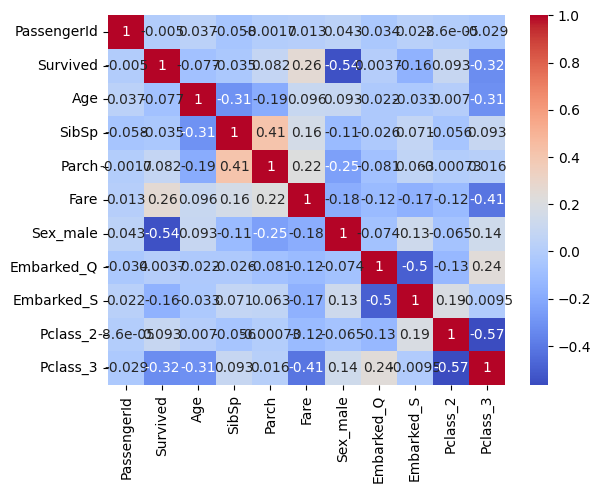

In [ ]:
# Showing Correlation Plot
sns.heatmap(titanic_encoded.corr(),annot=True,cmap='coolwarm')
plt.show()

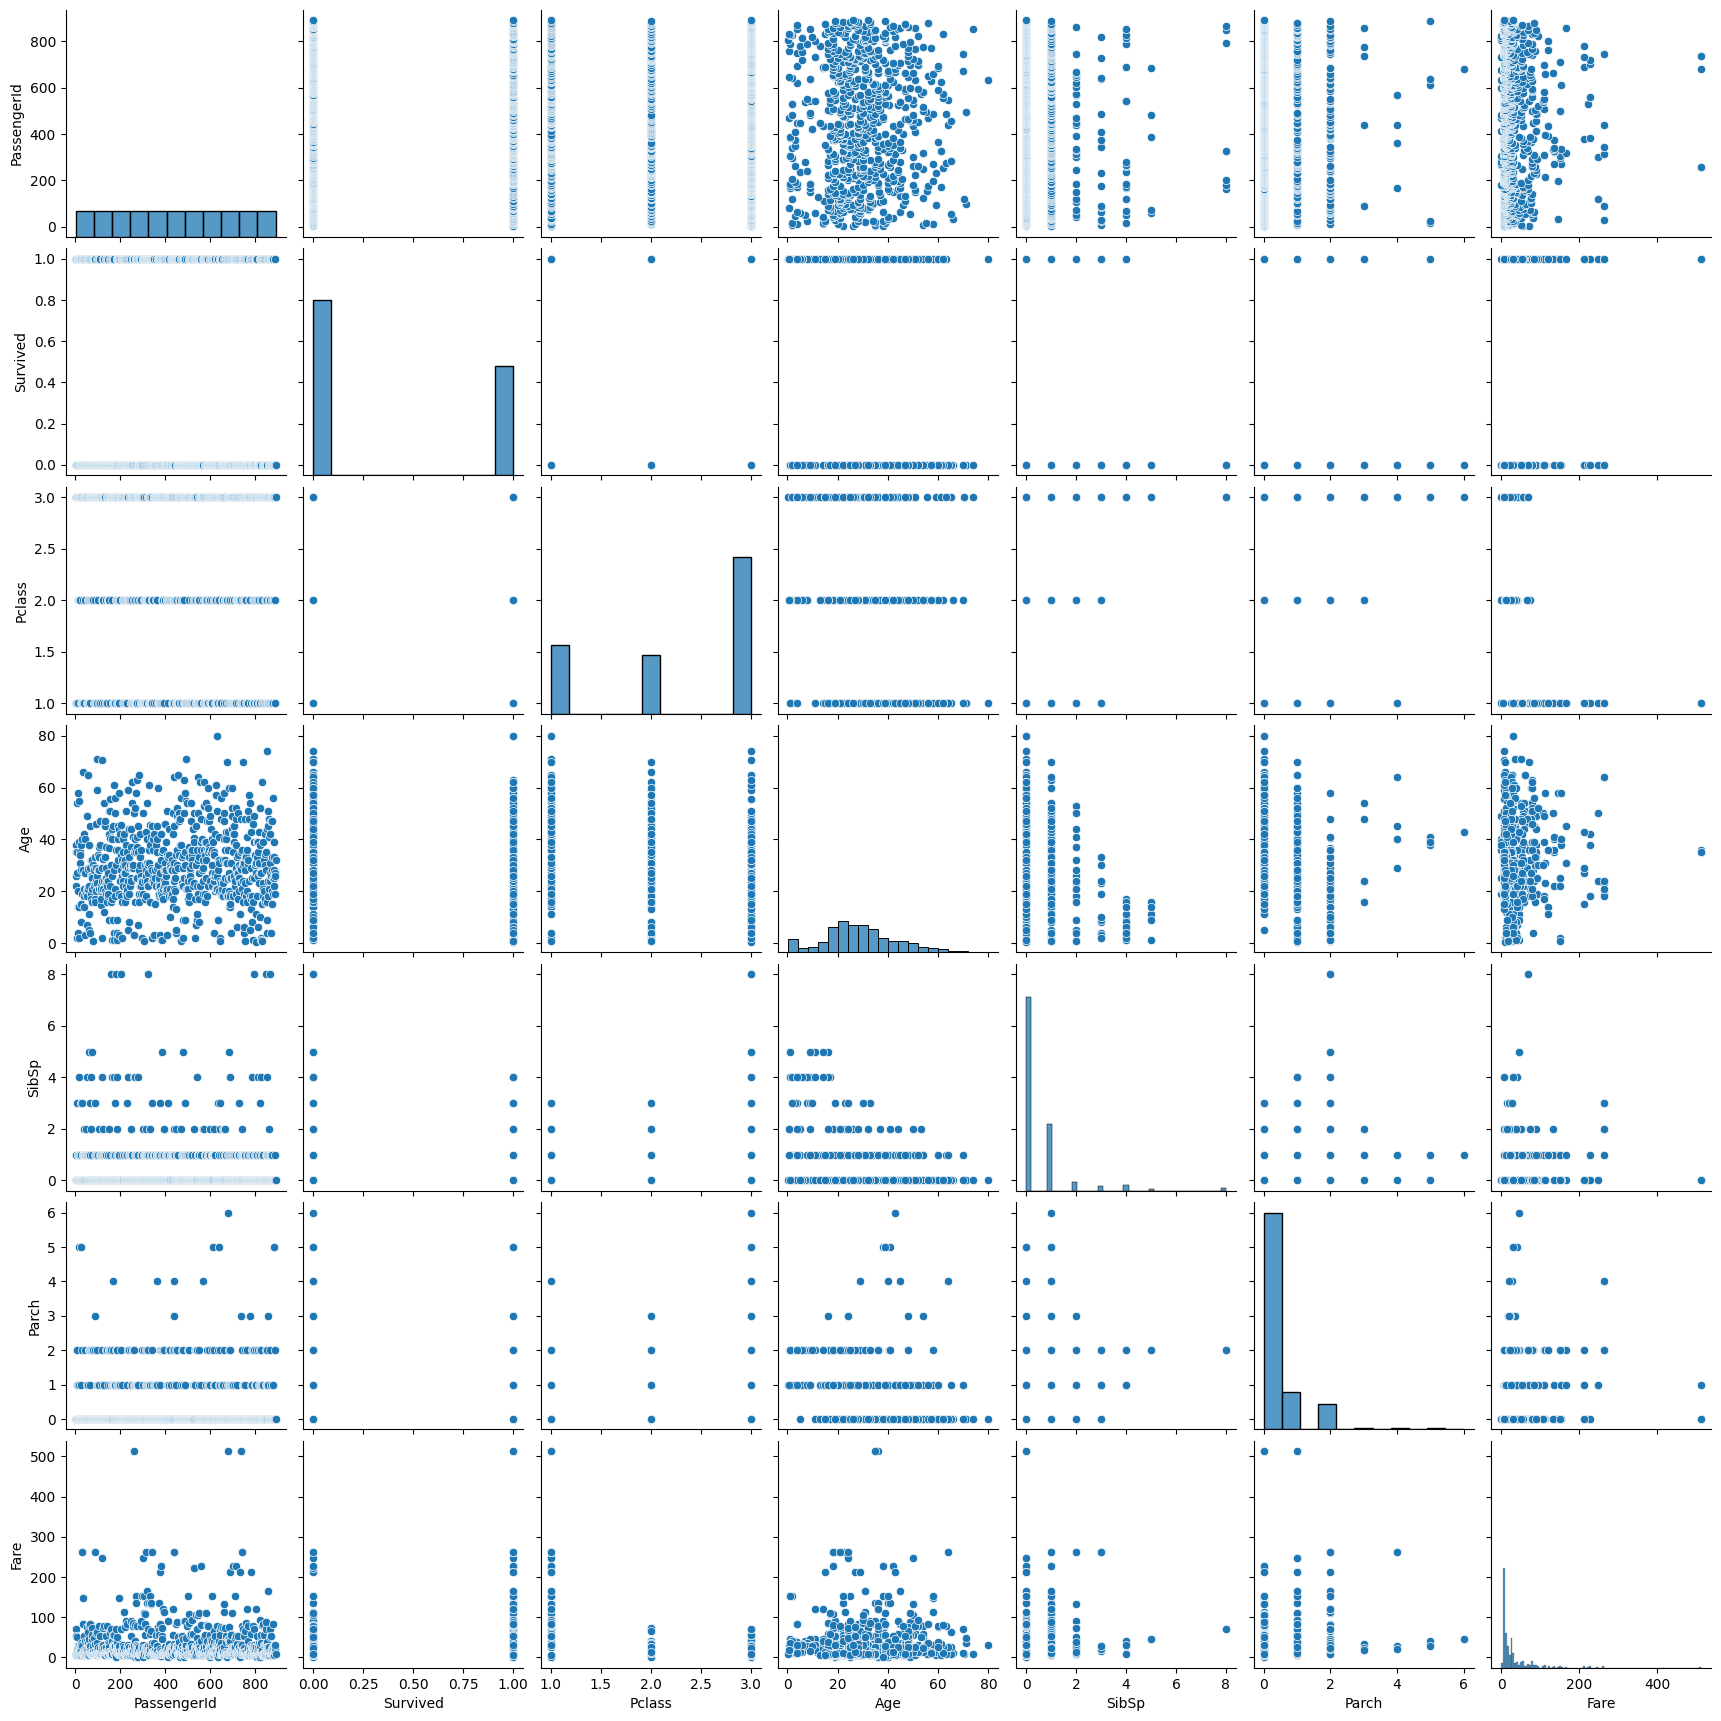

In [ ]:
# Plotting pairplot
sns.pairplot(titanic)
plt.show()

# Checking the target variable

In [ ]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

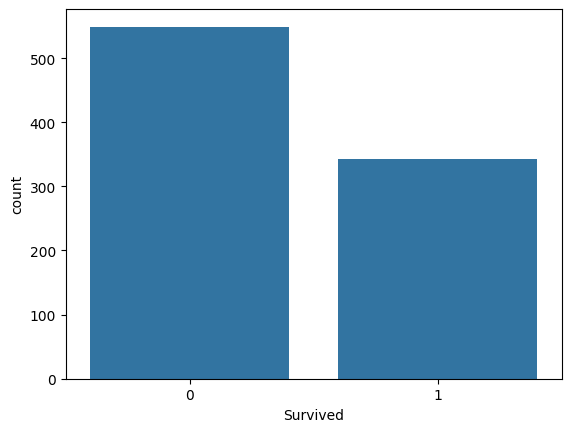

In [ ]:
sns.countplot(x=titanic['Survived'])
plt.show()

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()

# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


#Data Modeling

In [ ]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Selecting the independent and dependent Features

In [ ]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train_Test_Split

In [ ]:
print(891*0.10)

89.10000000000001


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


# Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)

In [ ]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

**Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
titanic = pd.read_csv(file_path)

# Convert categorical variables into dummy/indicator variables
titanic_encoded = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Drop non-numeric columns
titanic_encoded = titanic_encoded.drop(columns=['Name', 'Ticket', 'Cabin'])

# Define features and target variable
X = titanic_encoded.drop(columns=['Survived'])
y = titanic_encoded['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with an imputer and logistic regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.79


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
titanic = pd.read_csv(file_path)

# Convert categorical variables into dummy/indicator variables
titanic_encoded = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Drop non-numeric columns
titanic_encoded = titanic_encoded.drop(columns=['Name', 'Ticket', 'Cabin'])

# Define features and target variable
X = titanic_encoded.drop(columns=['Survived'])
y = titanic_encoded['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with an imputer and logistic regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Compute and print the training and testing scores
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training score: {train_score:.2f}")
print(f"Testing score: {test_score:.2f}")


Training score: 0.81
Testing score: 0.79


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
titanic = pd.read_csv(file_path)

# Convert categorical variables into dummy/indicator variables
titanic_encoded = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Drop non-numeric columns
titanic_encoded = titanic_encoded.drop(columns=['Name', 'Ticket', 'Cabin'])

# Define features and target variable
X = titanic_encoded.drop(columns=['Survived'])
y = titanic_encoded['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with an imputer and logistic regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Generate predictions using the pipeline
ypred_lr = pipeline.predict(X_test)
print(ypred_lr)

# Compute and print the training and testing scores
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training score: {train_score:.2f}")
print(f"Testing score: {test_score:.2f}")


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
Training score: 0.81
Testing score: 0.79


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix:
 [[91 14]
 [23 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Accuracy Score: 0.7932960893854749
Accuracy Score 0.7932960893854749


knn Classifier Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
titanic = pd.read_csv(file_path)

# Convert categorical variables into dummy/indicator variables
titanic_encoded = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Drop non-numeric columns
titanic_encoded = titanic_encoded.drop(columns=['Name', 'Ticket', 'Cabin'])

# Define features and target variable
X = titanic_encoded.drop(columns=['Survived'])
y = titanic_encoded['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with an imputer and KNeighborsClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('knn', KNeighborsClassifier(n_neighbors=8))
])

# Train the KNeighborsClassifier model
pipeline.fit(X_train, y_train)

# Generate predictions using the pipeline
ypred_knn = pipeline.predict(X_test)
print(ypred_knn)

# Compute and print the training and testing scores
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training score: {train_score:.2f}")
print(f"Testing score: {test_score:.2f}")

[0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Training score: 0.70
Testing score: 0.65


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def cls_eval(y_test, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Evaluate the model
cls_eval(y_test, ypred_knn)

# Calculate and print accuracy
acc_knn = accuracy_score(y_test, ypred_knn)

Confusion Matrix:
 [[96  9]
 [54 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75       105
           1       0.69      0.27      0.39        74

    accuracy                           0.65       179
   macro avg       0.66      0.59      0.57       179
weighted avg       0.66      0.65      0.60       179


Accuracy Score: 0.6480446927374302


SVC

In [ ]:
# Building Support Vector Classifier Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Drop the 'Cabin' column due to many missing values
df = df.drop(columns=['Cabin', 'Name', 'Ticket'])

# Separate the features and the target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

# Define preprocessing steps
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Building and training the Support Vector Classifier model
svc = SVC(C=1.0, random_state=42)
svc.fit(X_train, y_train)

# Predicting on the test set
y_pred = svc.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 81.01%


In [ ]:
# Compute and print the training score
train_score = svc.score(X_train, y_train)
print(f"Training score: {train_score * 100:.2f}%")

# Compute and print the testing score
test_score = svc.score(X_test, y_test)
print(f"Testing score: {test_score * 100:.2f}%")


Training score: 84.13%
Testing score: 81.01%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Drop the 'Cabin' column due to many missing values
df = df.drop(columns=['Cabin', 'Name', 'Ticket'])

# Separate the features and the target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

# Define preprocessing steps
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data and split it into training and testing sets
X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Building and training the Support Vector Classifier model
svc = SVC(C=1.0, random_state=42)
svc.fit(X_train, y_train)

# Generating Predictions
ypred_svc = svc.predict(X_test)
print(ypred_svc)

# Compute and print the training score
train_score = svc.score(X_train, y_train)
print(f"Training score: {train_score * 100:.2f}%")

# Compute and print the testing score
test_score = svc.score(X_test, y_test)
print(f"Testing score: {test_score * 100:.2f}%")


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
Training score: 84.13%
Testing score: 81.01%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def cls_eval(y_test, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Evaluate the model
cls_eval(y_test, ypred_svc)

# Alternatively, directly calculate accuracy
acc_svc = accuracy_score(y_test, ypred_svc)

Confusion Matrix:
 [[93 12]
 [22 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Accuracy Score: 0.8100558659217877


Random Forest Classifier

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Building the RandomForest Classifier Model with imputed data
rfc = RandomForestClassifier(n_estimators=80, criterion='entropy', min_samples_split=5, max_depth=10)
rfc.fit(x_train_imputed, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Assuming x_train, x_test, y_train, and y_test are defined

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)

# Building the RandomForest Classifier Model
rfc = RandomForestClassifier(n_estimators=80, criterion='entropy', min_samples_split=5, max_depth=10)
rfc.fit(x_train_imputed, y_train)

# Define mscore function
def mscore(model, X_train, X_test, y_train, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print("Training Score:", train_score)
    print("Testing Score:", test_score)

# Computing Training and Testing score
mscore(rfc, x_train_imputed, x_test_imputed, y_train, y_test)

Training Score: 0.8174157303370787
Testing Score: 0.5698324022346368


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in x_test
imputer = SimpleImputer(strategy='mean')
x_test_imputed = imputer.fit_transform(x_test)

# Generating Prediction
ypred_rfc = rfc.predict(x_test_imputed)
print(ypred_rfc)

[1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)

Confusion Matrix:
 [[88 17]
 [60 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.84      0.70       105
           1       0.45      0.19      0.27        74

    accuracy                           0.57       179
   macro avg       0.52      0.51      0.48       179
weighted avg       0.54      0.57      0.52       179


Accuracy Score: 0.5698324022346368


DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Building the Decision Tree Classifier Model
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=10)
dt.fit(x_train_imputed, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Assuming x_train, x_test, y_train, and y_test are defined

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)

# Building the Decision Tree Classifier Model
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=10)
dt.fit(x_train_imputed, y_train)

# Computing Training and Testing score
mscore(dt, x_train_imputed, x_test_imputed, y_train, y_test)

Training Score: 0.6811797752808989
Testing Score: 0.5921787709497207


In [ ]:
# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)

# Generating Prediction for Decision Tree Classifier
ypred_dt = dt.predict(x_test_imputed)
print(ypred_dt)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)

Confusion Matrix:
 [[96  9]
 [64 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.91      0.72       105
           1       0.53      0.14      0.22        74

    accuracy                           0.59       179
   macro avg       0.56      0.52      0.47       179
weighted avg       0.57      0.59      0.51       179


Accuracy Score: 0.5921787709497207


Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

# Assuming x_train, x_test, y_train, and y_test are defined

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)

# Building the AdaBoost Classifier Model
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)
adaboost.fit(x_train_imputed, y_train)

# Define mscore function (if not already defined)
def mscore(model, X_train, X_test, y_train, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print("Training Score:", train_score)
    print("Testing Score:", test_score)

# Computing Training and Testing score
mscore(adaboost, x_train_imputed, x_test_imputed, y_train, y_test)

# Generating Prediction
ypred_adaboost = adaboost.predict(x_test_imputed)
print(ypred_adaboost)

Training Score: 0.7106741573033708
Testing Score: 0.5921787709497207
[1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
cls_eval(y_test,ypred_adaboost)
acc_adab = accuracy_score(y_test,ypred_adaboost)

Confusion Matrix:
 [[88 17]
 [56 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.84      0.71       105
           1       0.51      0.24      0.33        74

    accuracy                           0.59       179
   macro avg       0.56      0.54      0.52       179
weighted avg       0.57      0.59      0.55       179


Accuracy Score: 0.5921787709497207


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.810056
0,Logistic Regression,0.793296
1,knn,0.648045
4,Decision Tree Classifier,0.592179
5,Ada Boost Classifier,0.592179
3,Random Forest Classifier,0.569832


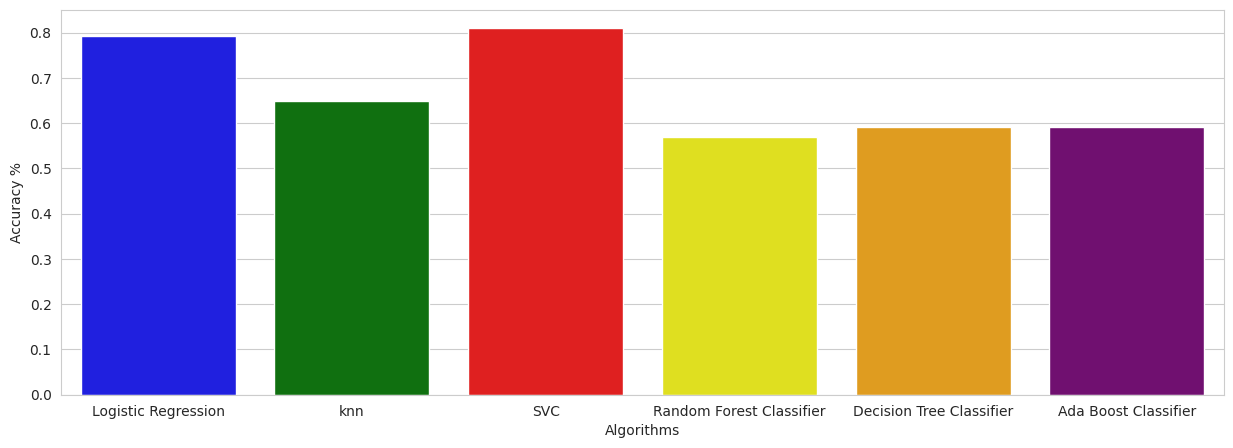

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["blue", "green", "red", "yellow", "orange", "purple"]

# Create a new column 'color' in your DataFrame 'models' based on the 'Model' column
model_colors = dict(zip(models['Model'].unique(), colors))
models['color'] = models['Model'].map(model_colors)

sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x='Model', y='Score', hue='Model', palette=model_colors, dodge=False, data=models, legend=False)
plt.show()


# Conclusion
**SVC Model got the Highest Accuracy**